-Analisar o crescimento da modalidade de ensino a distância

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(11.7,7.27)})
plt.rcParams.update({
    'font.size': 16,          # tamanho geral
    'axes.titlesize': 18,     # título dos subgráficos
    'axes.labelsize': 16,     # rótulos dos eixos
    'xtick.labelsize': 14,    # rótulo do eixo x
    'ytick.labelsize': 14,    # rótulo do eixo y
    'legend.fontsize': 14,    # legenda
    'figure.titlesize': 16    # título principal do gráfico
})

Importando a tabela

In [4]:
path = 'https://raw.githubusercontent.com/MuriloBarros304/censo-graduacao-br/main/data/raw/tabelas_de_divulgacao_censo_da_educacao_superior_2023.xls'

In [5]:
df_ingressantes = pd.read_excel(path, sheet_name="Tab3.04", header=None)
df_concluintes = pd.read_excel(path, sheet_name="Tab3.05", header=None)
# df_areas = pd.read_excel(path, sheet_name="Tab2.03", header=None)

df_ingressantes = df_ingressantes.iloc[7:]
df_ingressantes = df_ingressantes.drop(71)
df_concluintes = df_concluintes.iloc[8:]
df_concluintes = df_concluintes.drop(61)


In [6]:

df_concluintes.columns=[
    'Ano', 'Grau', 'Total geral', 'Total geral publica',
    'Total geral federal',	'Total geral estadual',	'Total geral municipal',
    'Total geral privada',	'Total geral com fins',	'Total geral sem fins',
    'Total presencial',	'Total presencial publica',	'Total presencial federal',
    'Total presencial estadual',	'Total presencial municipal',
    'Total presencial privada',	'Total presencial com fins',
    'Total presencial sem fins',	'Total geral remota',
    'Total remota publica',	'Total remota  federal',
    'Total remota estadual',	'Total remota municipal','Total remota privada',
    'Total remota com fins', 'Total remota sem fins'
    ]

df_ingressantes.columns=[
    'Ano', 'Grau', 'Total geral', 'Total geral publica', 'Total geral federal',
    'Total geral estadual',	'Total geral municipal', 'Total geral privada',
    'Total geral com fins',	'Total geral sem fins',	'Total presencial',	'Total presencial publica',
    'Total presencial federal',	'Total presencial estadual', 'Total presencial municipal',
    'Total presencial privada',	'Total presencial com fins', 'Total presencial sem fins',
    'Total geral remota', 'Total remota publica', 'Total remota  federal',
    'Total remota estadual', 'Total remota municipal', 'Total remota privada',
    'Total remota com fins', 'Total remota sem fins'
    ]
#df_ingressantes.head()

# df_concluintes.head()

In [7]:
#Limpa as linhas vazias, também da reset nos indices
df_concluintes = df_concluintes.dropna(how='all')
df_concluintes.reset_index(drop=True,inplace=True)

#Limpa as linhas vazias, também da reset nos indices
df_ingressantes = df_ingressantes.dropna(how='all')
df_ingressantes.reset_index(drop=True,inplace=True)

df_concluintes['Ano'] = df_concluintes['Ano'].ffill()
df_ingressantes['Ano'] = df_ingressantes['Ano'].ffill()

df_concluintes = df_concluintes.fillna(0)
df_concluintes = df_concluintes.replace({'.':0, '-':0})
df_ingressantes = df_ingressantes.fillna(0)
df_ingressantes = df_ingressantes.replace({'.':0, '-':0})

#Convertendo todas as colunas para seus respectivos tipos
df_ingressantes =  df_ingressantes.astype({
   "Ano":int,	"Grau":str,	'Total geral':int,	'Total geral publica':int,	'Total geral federal':int,	'Total geral estadual':int,	'Total geral municipal':int,	'Total geral privada':int,	'Total geral com fins':int,	'Total geral sem fins':int,	'Total presencial':int,	'Total presencial publica':int,	'Total presencial federal':int,	'Total presencial estadual':int,	'Total presencial municipal':int,	'Total presencial privada':int,	'Total presencial com fins':int,	'Total presencial sem fins':int,	'Total geral remota':int,	'Total remota publica':int,	'Total remota  federal':int,	'Total remota estadual':int,	'Total remota municipal':int,	'Total remota privada':int,	'Total remota com fins':int,	'Total remota sem fins':int
})

#Convertendo todas as colunas para seus respectivos tipos
df_concluintes =  df_concluintes.astype({
   "Ano":int,	"Grau":str,	'Total geral':int,	'Total geral publica':int,	'Total geral federal':int,	'Total geral estadual':int,	'Total geral municipal':int,	'Total geral privada':int,	'Total geral com fins':int,	'Total geral sem fins':int,	'Total presencial':int,	'Total presencial publica':int,	'Total presencial federal':int,	'Total presencial estadual':int,	'Total presencial municipal':int,	'Total presencial privada':int,	'Total presencial com fins':int,	'Total presencial sem fins':int,	'Total geral remota':int,	'Total remota publica':int,	'Total remota  federal':int,	'Total remota estadual':int,	'Total remota municipal':int,	'Total remota privada':int,	'Total remota com fins':int,	'Total remota sem fins':int
})

df_ingressantes

<ipython-input-7-f26843d15ac4>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_concluintes['Ano'] = df_concluintes['Ano'].ffill()
<ipython-input-7-f26843d15ac4>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ingressantes['Ano'] = df_ingressantes['Ano'].ffill()
<ipython-input-7-f26843d15ac4>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

,Ano,Grau,Total geral,Total geral publica,Total geral federal,Total geral estadual,Total geral municipal,Total geral privada,Total geral com fins,Total geral sem fins,...,Total presencial com fins,Total presencial sem fins,Total geral remota,Total remota publica,Total remota federal,Total remota estadual,Total remota municipal,Total remota privada,Total remota com fins,Total remota sem fins
0,2013,Total,2742950,531846,325267,142842,63737,2211104,1187952,1023152,...,837242,895363,515405,36906,26064,3218,7624,478499,350710,127789
1,2013,Bacharelado,1738272,309384,200840,62937,45607,1428888,722764,706124,...,616154,669610,153363,10239,7462,506,2271,143124,106610,36514
2,2013,Licenciatura,469237,153372,91410,50921,11041,315865,168308,147557,...,71707,96215,167973,20030,16088,2712,1230,147943,96601,51342
3,2013,Tecnológico,521766,55766,23794,24883,7089,466000,296880,169120,...,149381,129187,194069,6637,2514,0,4123,187432,147499,39933
4,2013,Não aplicável,13675,13324,9223,4101,0,351,0,351,...,0,351,0,0,0,0,0,0,0,0
5,2014,Total,3110848,548542,346991,148616,52935,2562306,1488209,1074097,...,971646,906837,727738,43915,35455,6520,1940,683823,516563,167260
6,2014,Bacharelado,1952328,311782,206753,64082,40947,1640546,889386,751160,...,741385,698178,209272,8289,6980,943,366,200983,148001,52982
7,2014,Licenciatura,568447,164170,102637,52124,9409,404277,250188,154089,...,77101,88483,271872,33179,26576,5576,1027,238693,173087,65606
8,2014,Tecnológico,569973,53093,23067,27483,2543,516880,348635,168245,...,153160,119573,246594,2447,1899,1,547,244147,195475,48672
9,2014,Não aplicável,20100,19497,14534,4927,36,603,0,603,...,0,603,0,0,0,0,0,0,0,0


In [8]:
#Cria o df_ingressantes_totais
df_ingressantes_totais = df_ingressantes[df_ingressantes['Grau'] == 'Total']

#Cria o df_concluintes_totais
df_concluintes_totais = df_concluintes[df_concluintes['Grau'] == 'Total']

df_concluintes_totais

,Ano,Grau,Total geral,Total geral publica,Total geral federal,Total geral estadual,Total geral municipal,Total geral privada,Total geral com fins,Total geral sem fins,...,Total presencial com fins,Total presencial sem fins,Total geral remota,Total remota publica,Total remota federal,Total remota estadual,Total remota municipal,Total remota privada,Total remota com fins,Total remota sem fins
0,2013,Total,991010,229278,115336,82892,31050,761732,361517,400215,...,267268,356409,161072,23017,7544,12744,2729,138055,94249,43806
4,2014,Total,1027092,241765,128084,89602,24079,785327,391638,393689,...,262125,349465,189788,16051,8096,7526,429,173737,129513,44224
8,2015,Total,1150067,239896,134447,86770,18679,910171,482206,427965,...,311025,381142,233704,15700,9846,5548,306,218004,171181,46823
12,2016,Total,1169449,246875,146367,81279,19229,922574,495589,426985,...,327442,379718,230717,15303,9769,4986,548,215414,168147,47267
16,2017,Total,1199769,251793,151376,83951,16466,947976,522644,425332,...,339518,370027,252163,13732,8606,4805,321,238431,183126,55305
20,2018,Total,1264288,259302,156918,85886,16498,1004986,632268,372718,...,416066,331899,273873,16852,11045,5542,265,257021,216202,40819
24,2019,Total,1250076,251374,149673,87006,14695,998702,640081,358621,...,386417,308414,316039,12168,4845,7008,315,303871,253664,50207
28,2020,Total,1278622,204174,118470,69820,15884,1074448,702348,372100,...,386299,305565,400393,17809,10209,7233,367,382584,316049,66535
32,2021,Total,1327188,219342,128771,76244,14327,1107846,765812,342034,...,368488,276194,485141,21977,12014,9502,461,463164,397324,65840
36,2022,Total,1287761,239079,142853,82608,13618,1048682,735377,313305,...,337975,243952,483834,17079,8160,8616,303,466755,397402,69353


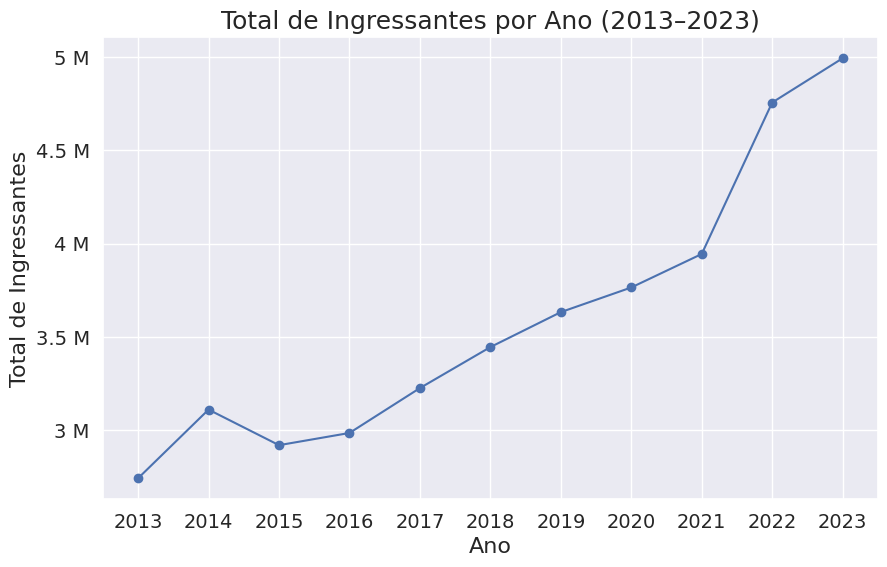

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    df_ingressantes_totais['Ano'],
    df_ingressantes_totais['Total geral'],
    marker='o', color='b',
    label='Ingressantes'
)

ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax.set_xticks(df_ingressantes_totais['Ano'])
plt.xlabel('Ano')
plt.ylabel('Total de Ingressantes')
plt.title('Total de Ingressantes por Ano (2013–2023)')
plt.grid(True)
plt.show()


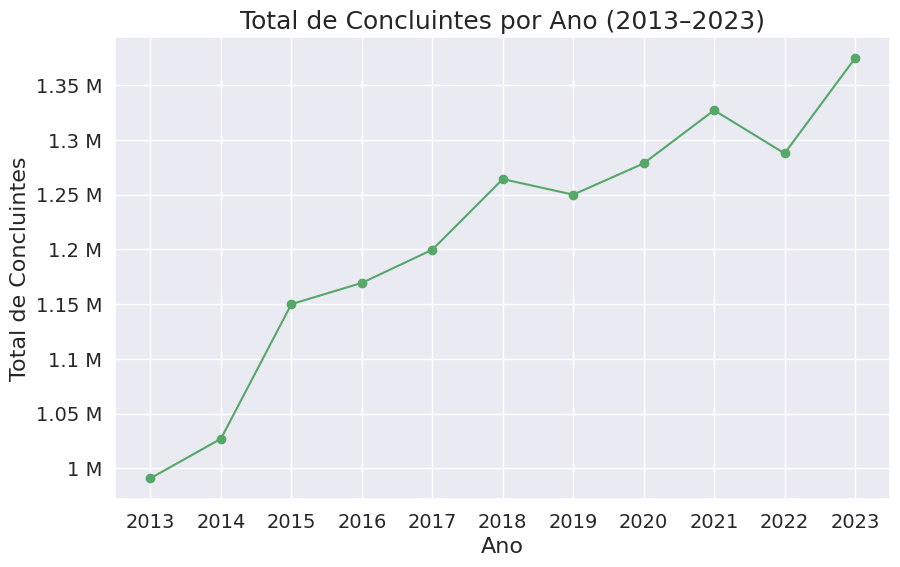

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    df_concluintes_totais['Ano'],
    df_concluintes_totais['Total geral'],
    marker='o', color='g',
    label='Concluintes'
)

ax.set_xticks(df_concluintes_totais['Ano'])
ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.xlabel('Ano')
plt.ylabel('Total de Concluintes')
plt.title('Total de Concluintes por Ano (2013–2023)')
plt.grid(True)
plt.show()

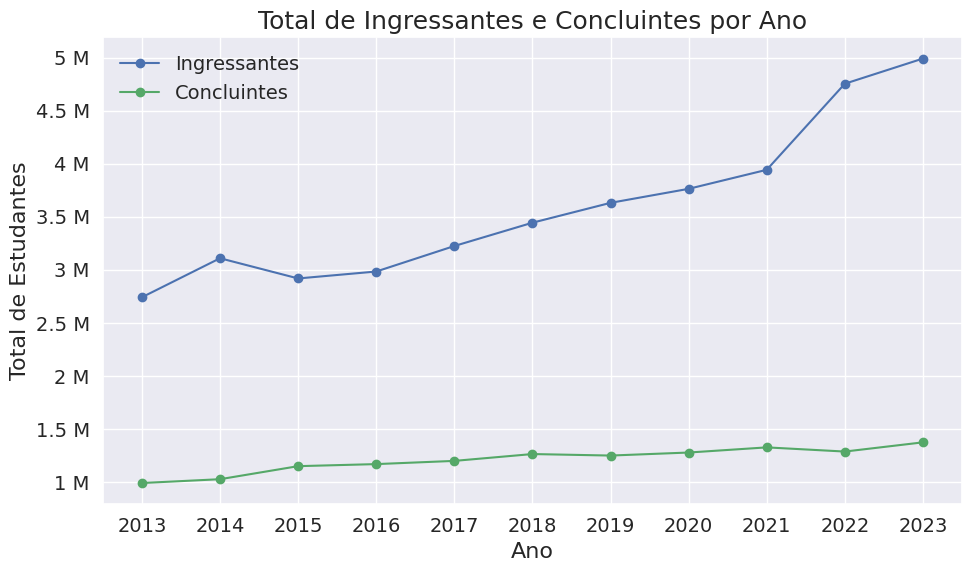

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    df_ingressantes_totais['Ano'],
    df_ingressantes_totais['Total geral'],
    marker='o', color='b',
    label='Ingressantes'
)
ax.plot(
    df_concluintes_totais['Ano'],
    df_concluintes_totais['Total geral'],
    marker='o', color='g',
    label='Concluintes'
)

ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))

ax.set_xlabel('Ano')
ax.set_xticks(df_concluintes_totais['Ano'])
ax.set_ylabel('Total de Estudantes')
ax.set_title('Total de Ingressantes e Concluintes por Ano')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


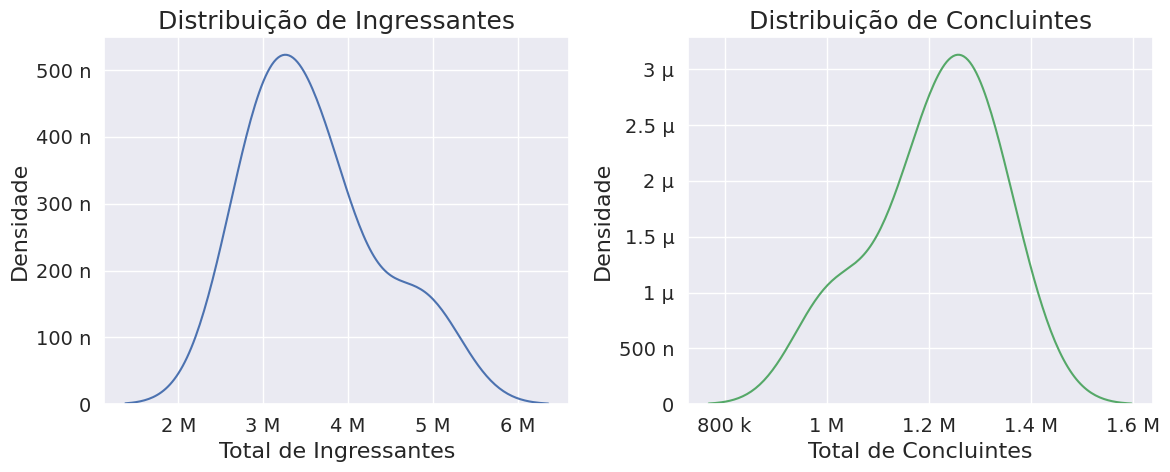

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot para ingressantes
sns.kdeplot(x=df_ingressantes_totais['Total geral'], color='b', ax=axes[0])
axes[0].xaxis.set_major_formatter(ticker.EngFormatter(unit=''))
axes[0].yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
axes[0].set_title('Distribuição de Ingressantes')
axes[0].set_xlabel('Total de Ingressantes')
axes[0].set_ylabel('Densidade')

# KDE plot para concluintes
sns.kdeplot(x=df_concluintes_totais['Total geral'], color='g', ax=axes[1])
axes[1].xaxis.set_major_formatter(ticker.EngFormatter(unit=''))
axes[1].yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
axes[1].set_title('Distribuição de Concluintes')
axes[1].set_xlabel('Total de Concluintes')
axes[1].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

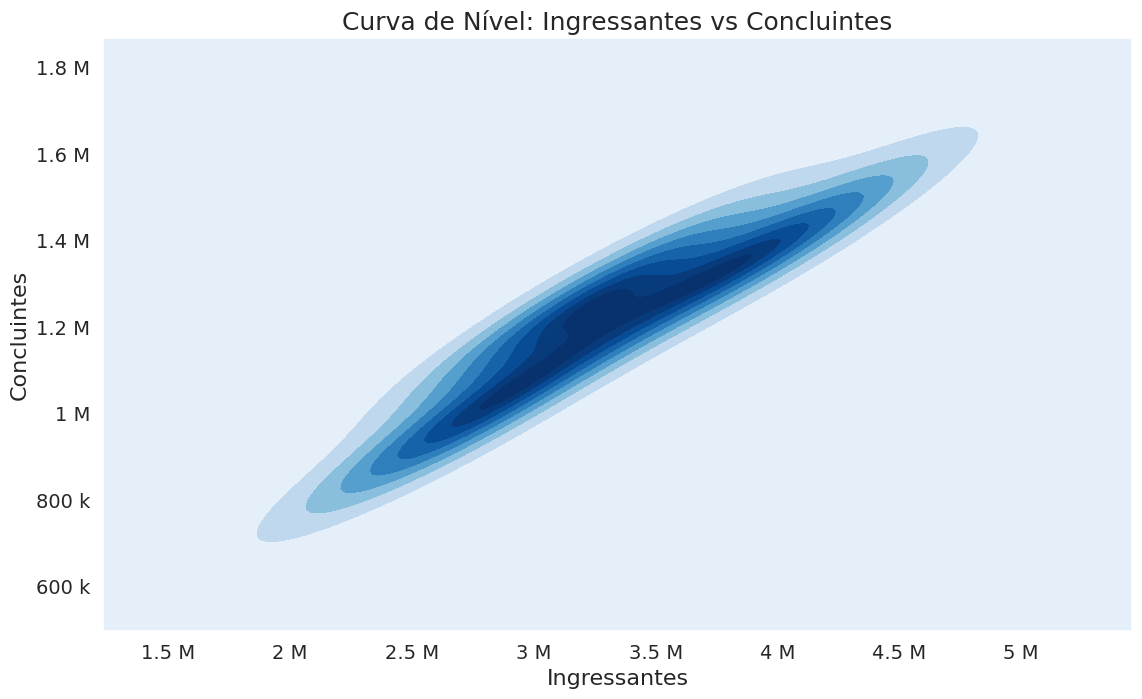

In [13]:
sns.kdeplot(
    x=df_ingressantes_totais['Total geral'],
    y=df_concluintes_totais['Total geral'],
    fill=True,
    cmap="Blues",
    thresh=False,
)

ax = plt.gca()

ax.xaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))

plt.title('Curva de Nível: Ingressantes vs Concluintes')
plt.xlabel('Ingressantes')
plt.ylabel('Concluintes')

plt.grid(True)
plt.tight_layout()
plt.show()

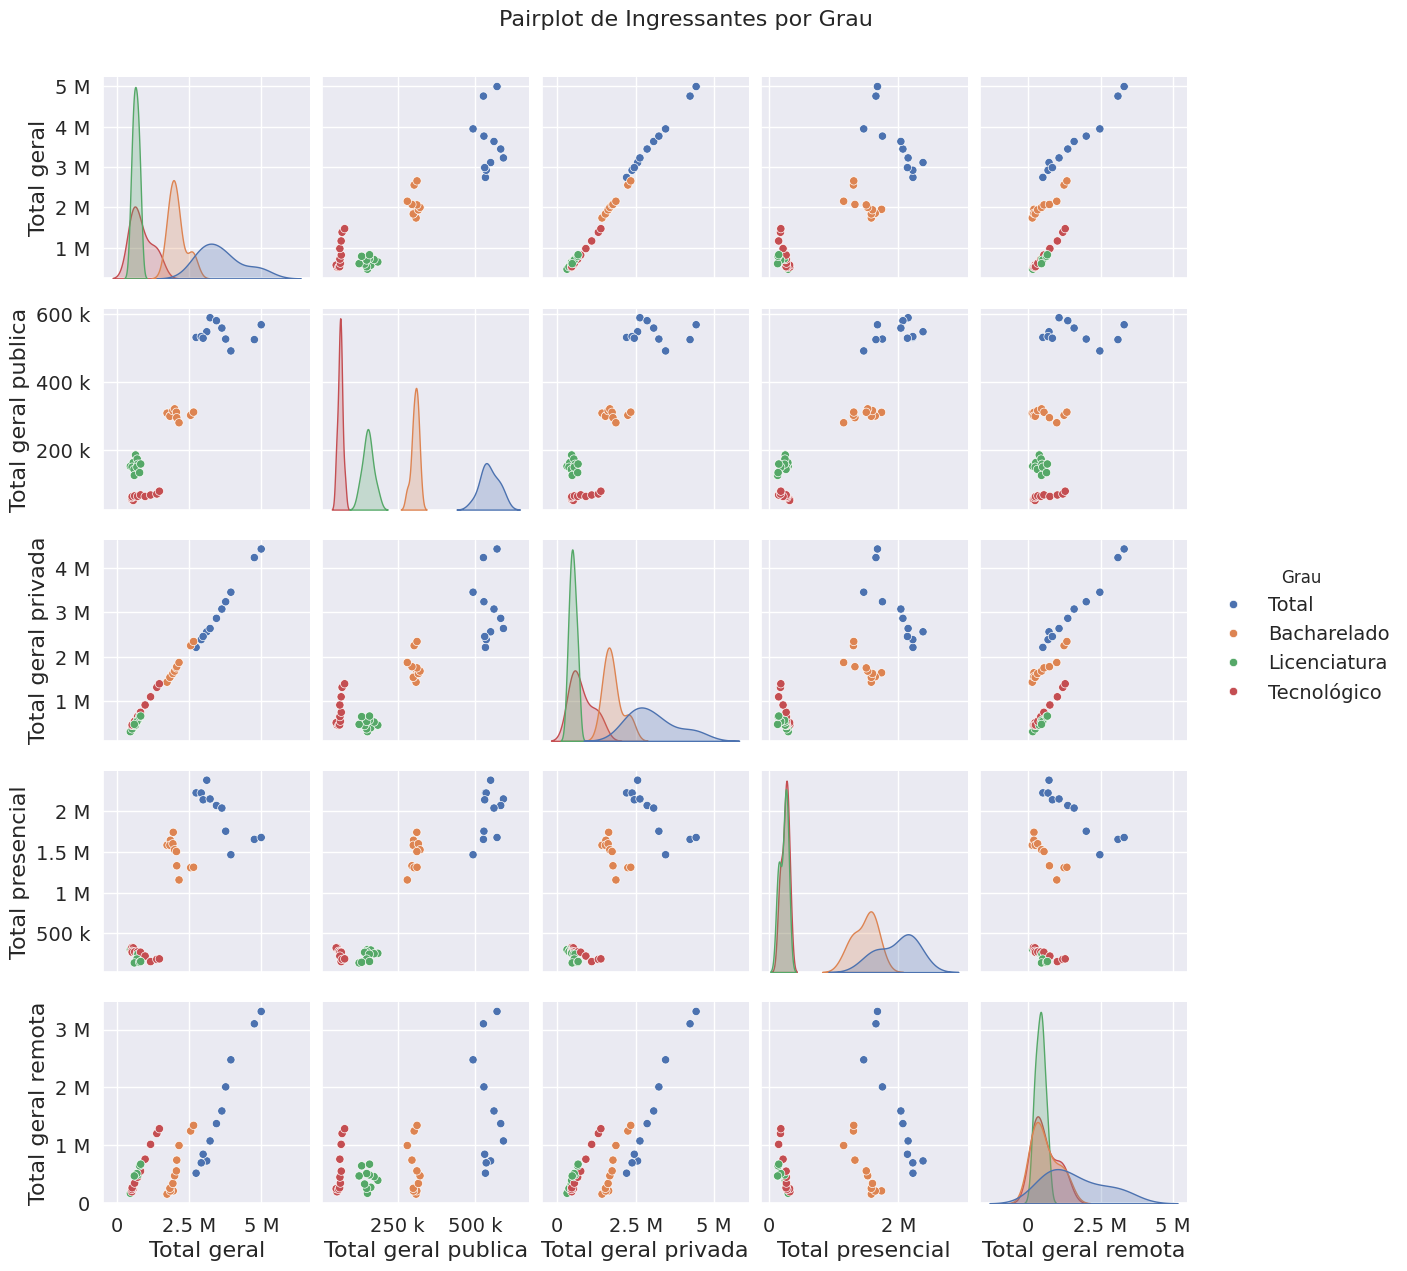

In [14]:
colunas_interesse_ingressantes = [
    'Total geral',
    'Total geral publica',
    'Total geral privada',
    'Total presencial',
    'Total geral remota'
]

df_ingressantes_novo = df_ingressantes[df_ingressantes['Grau'] != 'Não aplicável'] # Retirado o grau: não aplicável
colunas_para_plotar = [col for col in colunas_interesse_ingressantes if col in df_ingressantes_totais.columns and df_ingressantes_totais[col].dtype in ['int64', 'float64']]

g = sns.pairplot(df_ingressantes_novo, hue='Grau', vars=colunas_para_plotar, height=2.5, diag_kind='kde')

for ax in g.axes.flatten():
    if ax is not None:
        ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
        ax.xaxis.set_major_formatter(ticker.EngFormatter(unit=''))

# Ajuste de espaços para não sobrepor o suptitle
plt.suptitle('Pairplot de Ingressantes por Grau', y=1.02)
#plt.tight_layout()
plt.show()


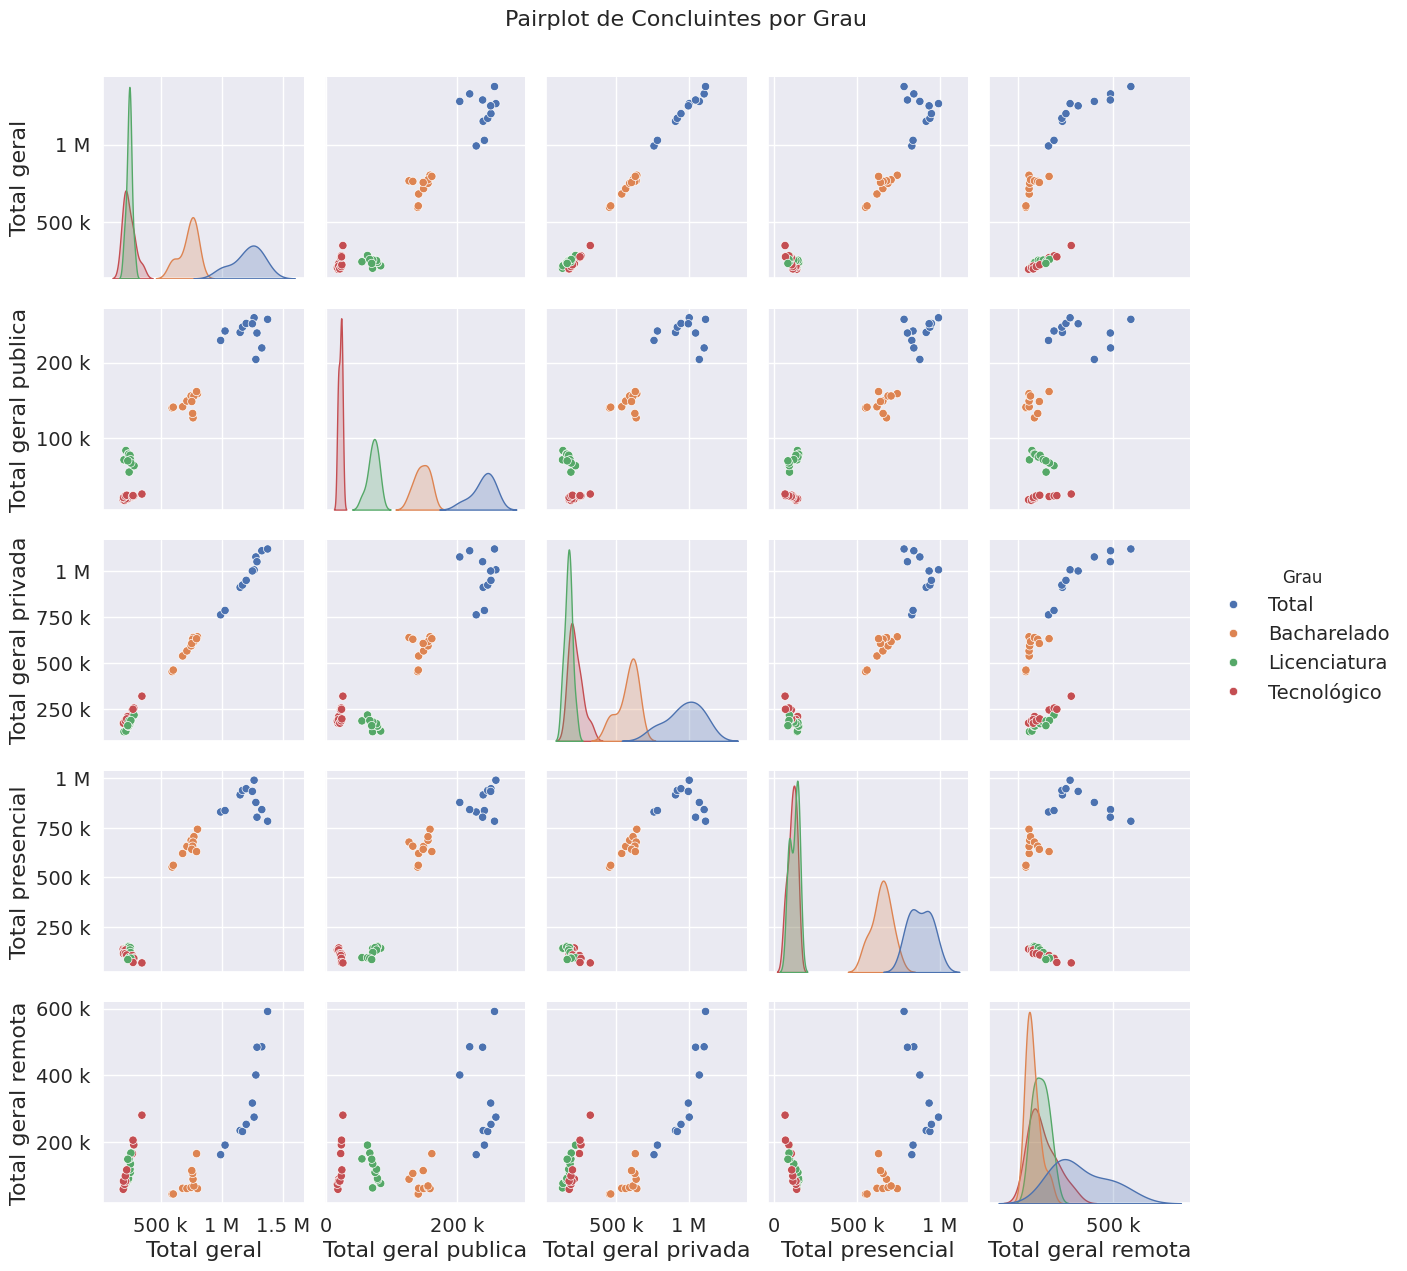

In [15]:
colunas_interesse_concluintes = [
    'Total geral',
    'Total geral publica',
    'Total geral privada',
    'Total presencial',
    'Total geral remota'
]

colunas_para_plotar = [col for col in colunas_interesse_concluintes if col in df_concluintes_totais.columns and df_concluintes_totais[col].dtype in ['int64', 'float64']]

g = sns.pairplot(df_concluintes, hue='Grau', vars=colunas_para_plotar, height=2.5, diag_kind='kde')

for ax in g.axes.flatten():
    if ax is not None:
        ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
        ax.xaxis.set_major_formatter(ticker.EngFormatter(unit=''))

# Ajuste de espaços para não sobrepor o suptitle
plt.suptitle('Pairplot de Concluintes por Grau', y=1.02)
#plt.tight_layout()
plt.show()


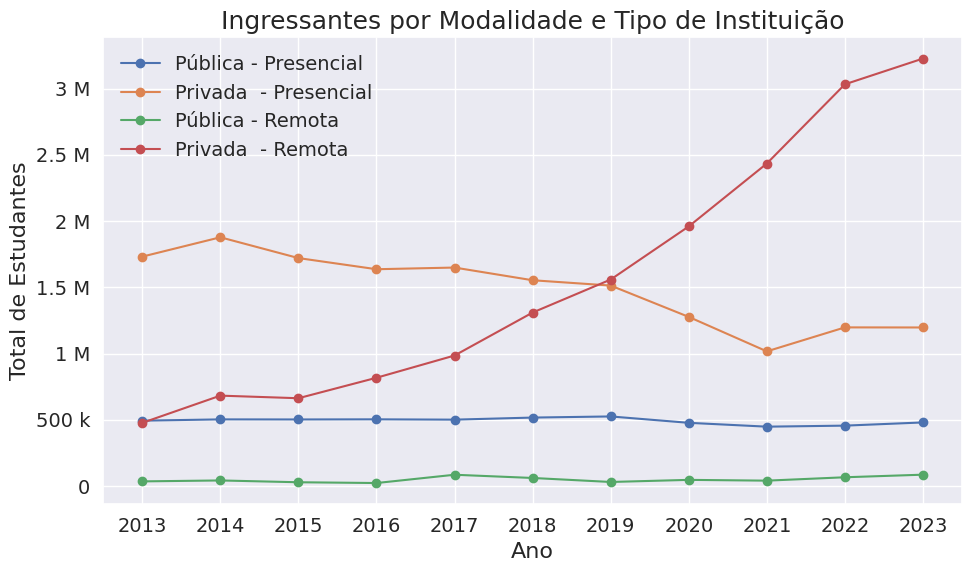

In [16]:
ing_pub_pres = df_ingressantes_totais['Total presencial publica']
ing_pri_pres = df_ingressantes_totais['Total presencial privada']
ing_pub_rem = df_ingressantes_totais['Total remota publica']
ing_pri_rem = df_ingressantes_totais['Total remota privada']
anos = df_ingressantes_totais['Ano']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(anos, ing_pub_pres, marker='o', label='Pública - Presencial')
ax.plot(anos, ing_pri_pres, marker='o', label='Privada  - Presencial')
ax.plot(anos, ing_pub_rem,  marker='o', label='Pública - Remota')
ax.plot(anos, ing_pri_rem,  marker='o', label='Privada  - Remota')

ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax.set_xticks(anos)
ax.set_xlabel('Ano')
ax.set_ylabel('Total de Estudantes')
ax.set_title('Ingressantes por Modalidade e Tipo de Instituição')
ax.legend()
plt.tight_layout()
plt.show()

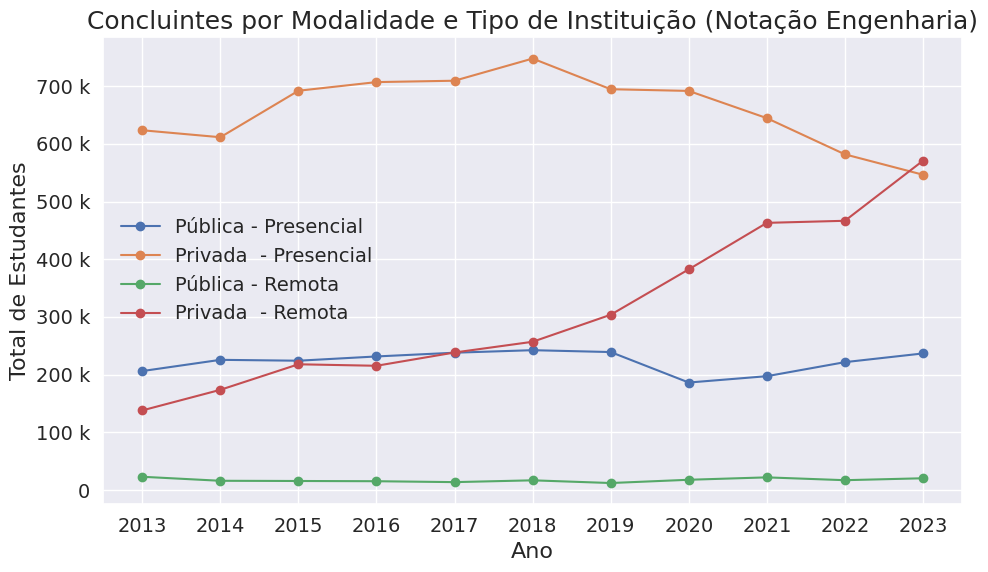

In [17]:
con_pub_pres = df_concluintes_totais['Total presencial publica']
con_pri_pres = df_concluintes_totais['Total presencial privada']
con_pub_rem  = df_concluintes_totais['Total remota publica']
con_pri_rem  = df_concluintes_totais['Total remota privada']
anos = df_concluintes_totais['Ano']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(anos, con_pub_pres, marker='o', label='Pública - Presencial')
ax.plot(anos, con_pri_pres, marker='o', label='Privada  - Presencial')
ax.plot(anos, con_pub_rem,  marker='o', label='Pública - Remota')
ax.plot(anos, con_pri_rem,  marker='o', label='Privada  - Remota')

ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax.set_xticks(anos)
ax.set_xlabel('Ano')
ax.set_ylabel('Total de Estudantes')
ax.set_title('Concluintes por Modalidade e Tipo de Instituição (Notação Engenharia)')
ax.legend()
plt.tight_layout()
plt.show()


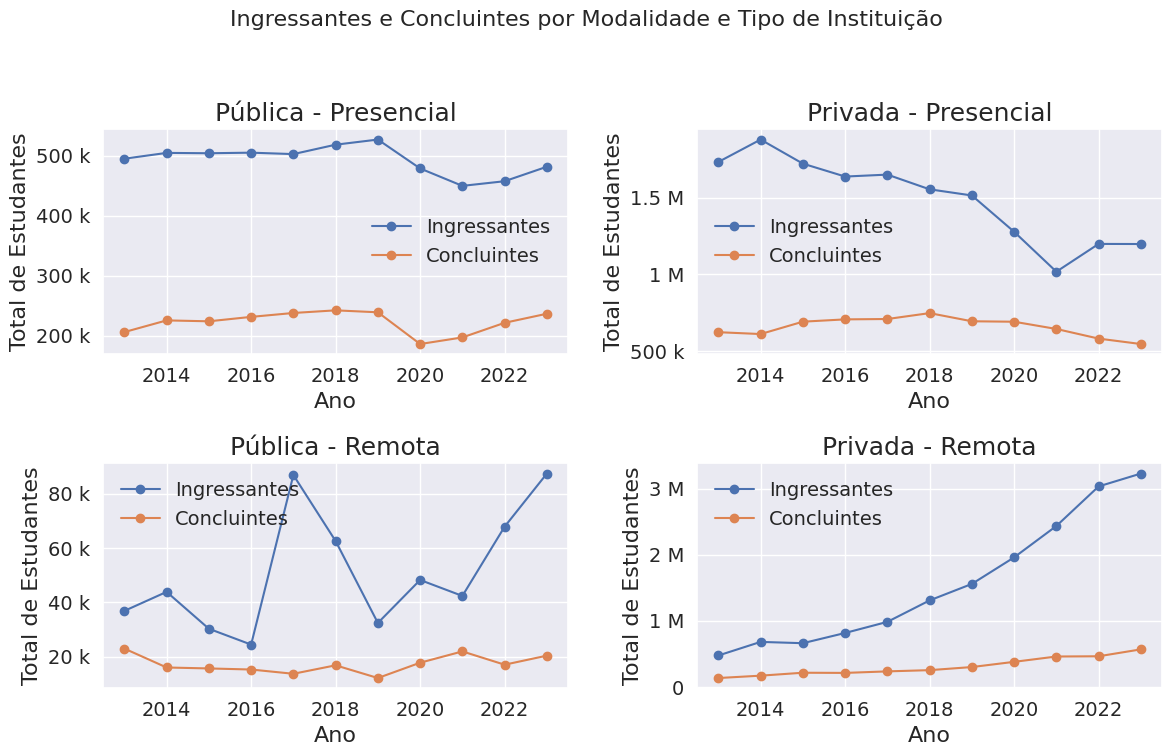

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: Pública - Presencial
ax[0][0].plot(df_ingressantes_totais['Ano'], df_ingressantes_totais['Total presencial publica'], marker='o', label='Ingressantes')
ax[0][0].plot(df_concluintes_totais['Ano'], df_concluintes_totais['Total presencial publica'], marker='o', label='Concluintes')
ax[0][0].set_title('Pública - Presencial')
ax[0][0].set_xlabel('Ano')
ax[0][0].set_ylabel('Total de Estudantes')
ax[0][0].yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax[0][0].legend()

# Subplot 2: Privada - Presencial
ax[0][1].plot(df_ingressantes_totais['Ano'], df_ingressantes_totais['Total presencial privada'], marker='o', label='Ingressantes')
ax[0][1].plot(df_concluintes_totais['Ano'], df_concluintes_totais['Total presencial privada'], marker='o', label='Concluintes')
ax[0][1].set_title('Privada - Presencial')
ax[0][1].set_xlabel('Ano')
ax[0][1].set_ylabel('Total de Estudantes')
ax[0][1].yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax[0][1].legend()

# Subplot 3: Pública - Remota
ax[1][0].plot(df_ingressantes_totais['Ano'], df_ingressantes_totais['Total remota publica'], marker='o', label='Ingressantes')
ax[1][0].plot(df_concluintes_totais['Ano'], df_concluintes_totais['Total remota publica'], marker='o', label='Concluintes')
ax[1][0].set_title('Pública - Remota')
ax[1][0].set_xlabel('Ano')
ax[1][0].set_ylabel('Total de Estudantes')
ax[1][0].yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax[1][0].legend()

# Subplot 4: Privada - Remota
ax[1][1].plot(df_ingressantes_totais['Ano'], df_ingressantes_totais['Total remota privada'], marker='o', label='Ingressantes')
ax[1][1].plot(df_concluintes_totais['Ano'], df_concluintes_totais['Total remota privada'], marker='o', label='Concluintes')
ax[1][1].set_title('Privada - Remota')
ax[1][1].set_xlabel('Ano')
ax[1][1].set_ylabel('Total de Estudantes')
ax[1][1].yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax[1][1].legend()

# Título geral e ajustes finais
fig.suptitle("Ingressantes e Concluintes por Modalidade e Tipo de Instituição", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


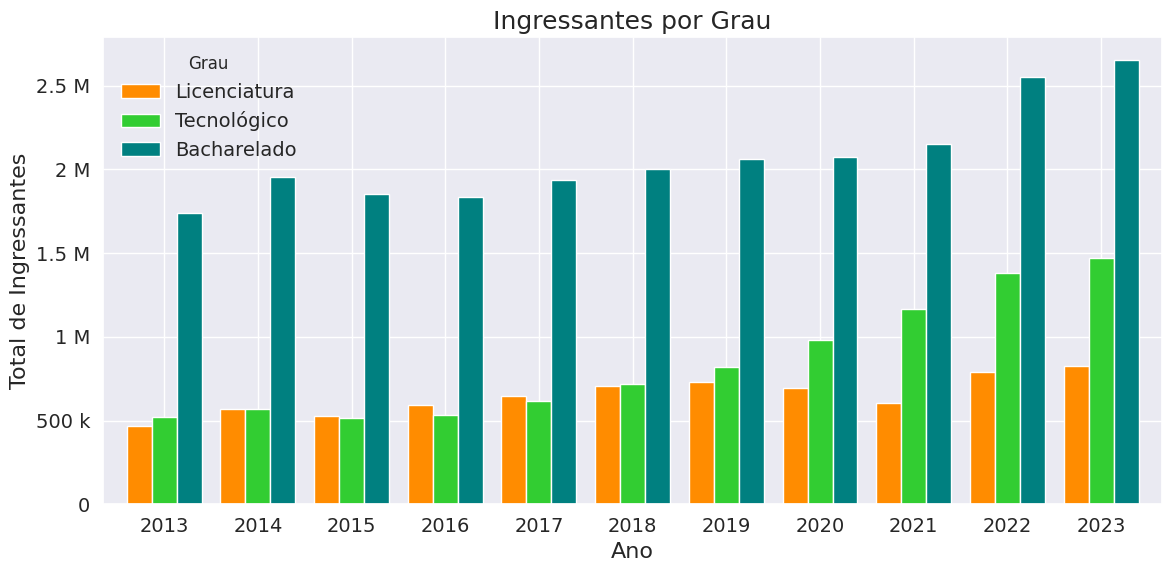

In [26]:
# Remove o grau "Total e não aplicavel"
df_ingressantes_graus = df_ingressantes[~df_ingressantes['Grau'].isin(['Total', 'Não aplicável'])]

# Pivot: linhas = anos, colunas = graus, valores = total
df_pivot = df_ingressantes_graus.pivot(index='Ano', columns='Grau', values='Total geral').fillna(0)

# Ordena as colunas (graus) pelo total crescente em todos os anos
ordem_graus = df_pivot.sum().sort_values().index
df_pivot = df_pivot[ordem_graus]

# Plotagem
cores = ['darkorange', 'limegreen', 'teal']
ax = df_pivot.plot(kind='bar', figsize=(12, 6), width=0.8, color=cores)
plt.title('Ingressantes por Grau')
plt.xlabel('Ano')
plt.ylabel('Total de Ingressantes')
ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.legend(title='Grau')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


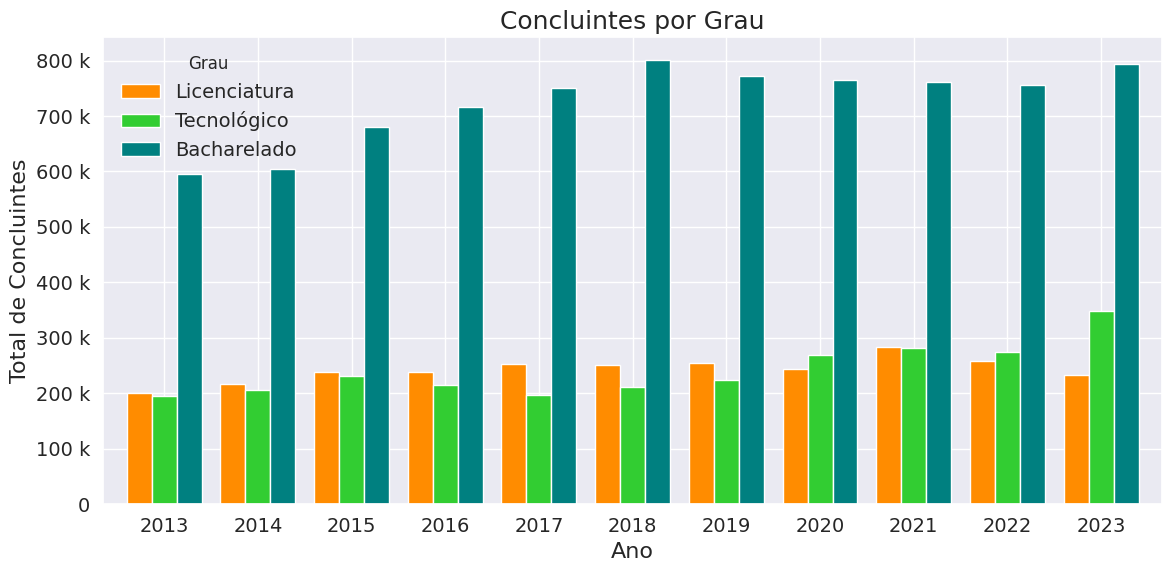

In [27]:
# Remove o grau "Total e não aplicavel"
df_concluintes_graus = df_concluintes[~df_concluintes['Grau'].isin(['Total'])]

# Pivot: linhas = anos, colunas = graus, valores = total
df_pivot = df_concluintes_graus.pivot(index='Ano', columns='Grau', values='Total geral').fillna(0)

# Ordena as colunas (graus) pelo total crescente em todos os anos
df_pivot = df_pivot[ordem_graus]

# Plotagem
cores = ['darkorange', 'limegreen', 'teal']
ax = df_pivot.plot(kind='bar', figsize=(12, 6), width=0.8, color=cores)

plt.title('Concluintes por Grau')
plt.xlabel('Ano')
plt.ylabel('Total de Concluintes')
ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.legend(title='Grau')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
anos_base = range(2013, 2018)  # Ingressantes de 2013 a 2017
resultados = []

for ano in anos_base:
    ingressantes = df_ingressantes[df_ingressantes['Ano'] == ano]['Total geral'].sum()
    concluintes = df_concluintes[df_concluintes['Ano'] == ano]['Total geral'].sum()

    taxa = (concluintes / ingressantes) * 100 if ingressantes > 0 else 0
    resultados.append({
        'Ano_ingresso': ano,
        'Ano_conclusao': ano + 5,
        'Ingressantes': ingressantes,
        'Concluintes': concluintes,
        'Taxa_aproveitamento (%)': round(taxa, 2)
    })


df_aproveitamento = pd.DataFrame(resultados)
print(df_aproveitamento)

# Dados
anos = df_aproveitamento['Ano_ingresso']
ingressantes = df_aproveitamento['Ingressantes']
concluintes = df_aproveitamento['Concluintes']




   Ano_ingresso  Ano_conclusao  Ingressantes  Concluintes  \
0          2013           2018       5485900      1982020   
1          2014           2019       6221696      2054184   
2          2015           2020       5840444      2300134   
3          2016           2021       5971288      2338898   
4          2017           2022       6452498      2399538   

   Taxa_aproveitamento (%)  
0                    36.13  
1                    33.02  
2                    39.38  
3                    39.17  
4                    37.19  


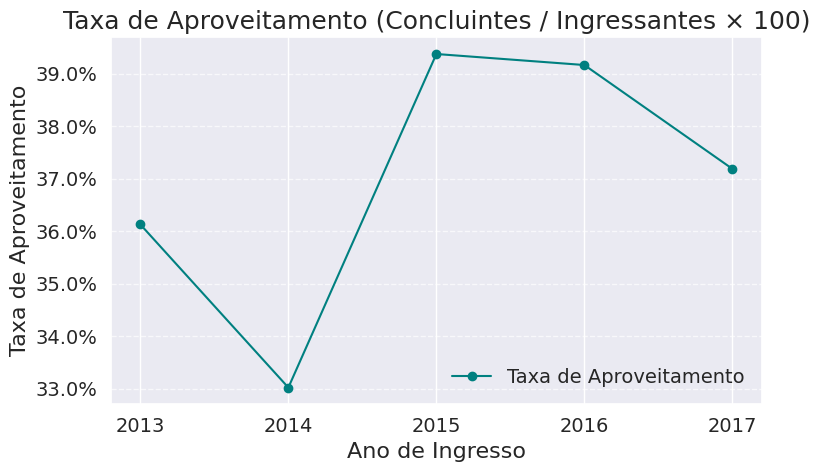

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Seu DataFrame de aproveitamento
# df_aproveitamento = pd.DataFrame(resultados)

# Eixo X: ano de ingresso
anos = df_aproveitamento['Ano_ingresso']
# Eixo Y: taxa em %
taxas = df_aproveitamento['Taxa_aproveitamento (%)']

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(anos, taxas, marker='o', linestyle='-', color='teal', label='Taxa de Aproveitamento')

# Formatação do eixo Y em %
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Labels e título
ax.set_xlabel('Ano de Ingresso')
ax.set_ylabel('Taxa de Aproveitamento')
ax.set_title('Taxa de Aproveitamento (Concluintes / Ingressantes × 100)')
ax.set_xticks(anos)  # garante mostrar todos os anos no eixo X
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


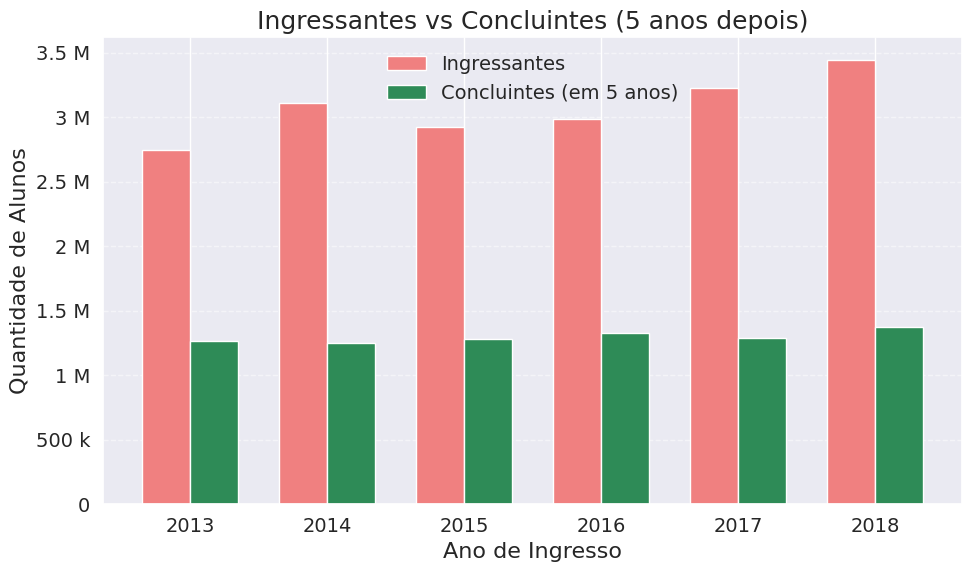

In [23]:
# Filtrar ingressantes (2013–2018) e concluintes (2018–2023)
df_ing = df_ingressantes_totais[df_ingressantes_totais['Ano'].between(2013, 2018)]
df_conc = df_concluintes_totais [df_concluintes_totais ['Ano'].between(2018, 2023)]

n = len(df_ing)  # deve dar 6
x = np.arange(n)
labels = df_ing['Ano'].astype(int)

largura = 0.35

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - largura/2, df_ing ['Total geral'], largura,
       label='Ingressantes', color='lightcoral')
ax.bar(x + largura/2, df_conc['Total geral'], largura,
       label='Concluintes (em 5 anos)', color='seagreen')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Ano de Ingresso')
ax.set_ylabel('Quantidade de Alunos')
ax.set_title('Ingressantes vs Concluintes (5 anos depois)')
ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
